In [90]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

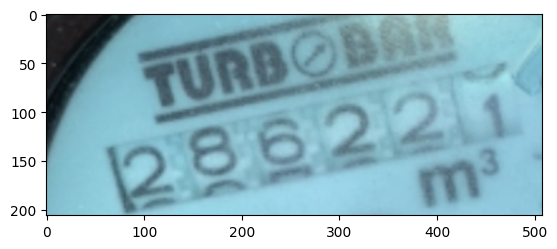

In [91]:
# load the example image and convert it to grayscale 
image = cv2.imread("01.png") 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image)
plt.show()

In [92]:
# read the text
text = pytesseract.image_to_string(image)
text

''

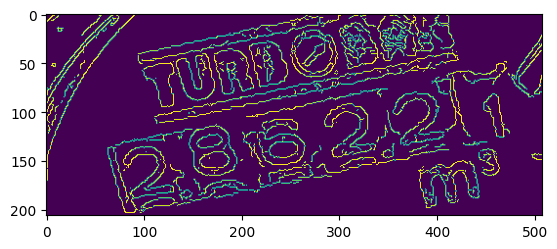

In [93]:
ret,thresh=cv2.threshold(image,127,250,0) 
edges=cv2.Canny(image,60,0) 
plt.imshow(edges)
plt.show()

In [94]:
# read the text
text = pytesseract.image_to_string(edges)
text

'ai ey\n\nMy\nGEE oe\nque\n\nere,\n\n—won\n\navy 2 0) a\n- 0 CZ G\nFr a aS a\nz pS\n\\ LA NEB\n—\n'

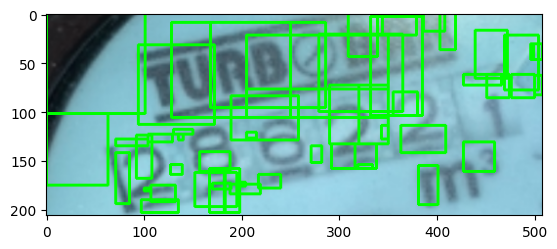

In [95]:
h, w = edges.shape

# obtain the boxes
boxes = pytesseract.image_to_boxes(edges)

# draw the boxes
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

plt.imshow(image)

In [96]:
# check to see if we should apply thresholding to preprocess the 
# image 
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 

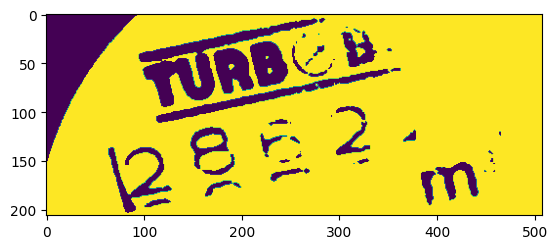

In [97]:
plt.imshow(gray)
plt.show()

In [98]:
# read the text
text = pytesseract.image_to_string(gray)
print(text)

In [99]:
text

''

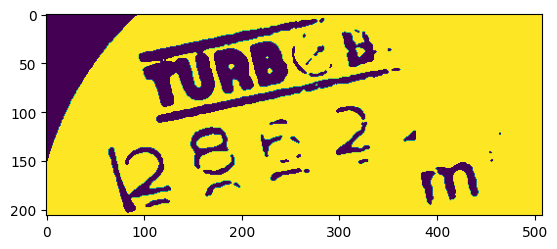

In [100]:
# make a check to see if median blurring should be done to remove 
# noise 

gray = cv2.medianBlur(gray, 3) 
 
# write the grayscale image to disk as a temporary file so we can 
# apply OCR to it 
filename = "{}.png".format(os.getpid()) 
cv2.imwrite(filename, gray) 

plt.imshow(gray)
plt.show()

In [101]:
text = pytesseract.image_to_string(Image.open(filename))
text

''

In [102]:
import cv2,numpy,pytesseract
def getNumber(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Otsu Tresholding automatically find best threshold value
    _, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    
    # invert the image if the text is white and background is black
    count_white = numpy.sum(binary_image > 0)
    count_black = numpy.sum(binary_image == 0)
    if count_black > count_white:
        binary_image = 255 - binary_image
        
    # padding
    final_image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(255, 255, 255))
    txt = pytesseract.image_to_string(
        final_image, config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
    return txt

In [103]:
image = cv2.imread("01.png") 
getNumber(image)

''